In [334]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from scipy.sparse import csr_matrix
import random

In [249]:
# Need to upload "boardgames.csv" to files every session.
file_path = ('/Users/melissa/Downloads/Project 4 /boardgames.csv')
boardgame_df = pd.read_csv(file_path)
# Unicode Problem on row 24
boardgame_df.head(5)

,objectid,name,average,avgweight,boardgamecategory,boardgamemechanic
0,174430,Gloomhaven,8.85292,3.8078,"['Adventure', 'Exploration', 'Fantasy', 'Fight...","['Campaign / Battle Card Driven', 'Cooperative..."
1,161936,Pandemic Legacy Season 1,8.62499,2.8301,"['Environmental', 'Medical']","['Action Points', 'Cooperative Game', 'Hand Ma..."
2,167791,Terraforming Mars,8.42299,3.2313,"['Economic', 'Environmental', 'Industry / Manu...","['Card Drafting', 'End Game Bonuses', 'Hand Ma..."
3,182028,Through the Ages A New Story of Civilization,8.49419,4.3850,"['Card Game', 'Civilization', 'Economic']","['Action Points', 'Auction/Bidding', 'Auction:..."
4,224517,Brass Birmingham,8.62031,3.9122,"['Economic', 'Industry / Manufacturing', 'Tran...","['Hand Management', 'Income', 'Loans', 'Market..."


In [250]:
# Our decoding (lambda function= no line defining and contain in one line of code. Decode - apply - replace )
decode_lambda = lambda x: bytearray(x, 'utf-8').decode('unicode-escape')
# Applying the decoding to the column, ignore errors.
boardgame_df['name'] = boardgame_df['name'].apply(lambda x: decode_lambda(x))
# Unicode replaced with proper characters
boardgame_df.head(5)

/Users/melissa/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: invalid escape sequence '\/'
  
/Users/melissa/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: invalid escape sequence '\T'
  
/Users/melissa/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: invalid escape sequence '\A'
  
/Users/melissa/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: invalid escape sequence '\W'
  
/Users/melissa/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: invalid escape sequence '\O'
  
/Users/melissa/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: invalid escape sequence '\D'
  
/Users/melissa/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: De

,objectid,name,average,avgweight,boardgamecategory,boardgamemechanic
0,174430,Gloomhaven,8.85292,3.8078,"['Adventure', 'Exploration', 'Fantasy', 'Fight...","['Campaign / Battle Card Driven', 'Cooperative..."
1,161936,Pandemic Legacy Season 1,8.62499,2.8301,"['Environmental', 'Medical']","['Action Points', 'Cooperative Game', 'Hand Ma..."
2,167791,Terraforming Mars,8.42299,3.2313,"['Economic', 'Environmental', 'Industry / Manu...","['Card Drafting', 'End Game Bonuses', 'Hand Ma..."
3,182028,Through the Ages A New Story of Civilization,8.49419,4.3850,"['Card Game', 'Civilization', 'Economic']","['Action Points', 'Auction/Bidding', 'Auction:..."
4,224517,Brass Birmingham,8.62031,3.9122,"['Economic', 'Industry / Manufacturing', 'Tran...","['Hand Management', 'Income', 'Loans', 'Market..."


In [251]:
boardgame_df = boardgame_df.rename(columns={'objectid': 'ID', 'name': 'Name', 'average': 'Avg Rating', 'avgweight': 'Complexity', 'boardgamecategory': 'Category', 'boardgamemechanic': 'Mechanic'})

# Other languages are supported by the decoding: Row 70
boardgame_df.head(5)

,ID,Name,Avg Rating,Complexity,Category,Mechanic
0,174430,Gloomhaven,8.85292,3.8078,"['Adventure', 'Exploration', 'Fantasy', 'Fight...","['Campaign / Battle Card Driven', 'Cooperative..."
1,161936,Pandemic Legacy Season 1,8.62499,2.8301,"['Environmental', 'Medical']","['Action Points', 'Cooperative Game', 'Hand Ma..."
2,167791,Terraforming Mars,8.42299,3.2313,"['Economic', 'Environmental', 'Industry / Manu...","['Card Drafting', 'End Game Bonuses', 'Hand Ma..."
3,182028,Through the Ages A New Story of Civilization,8.49419,4.3850,"['Card Game', 'Civilization', 'Economic']","['Action Points', 'Auction/Bidding', 'Auction:..."
4,224517,Brass Birmingham,8.62031,3.9122,"['Economic', 'Industry / Manufacturing', 'Tran...","['Hand Management', 'Income', 'Loans', 'Market..."


In [252]:
# Create new dataframe with columns that do not need dummy variables

boardgame_trunc = boardgame_df.drop(["Category","Mechanic"],axis=1)
boardgame_trunc.head()

,ID,Name,Avg Rating,Complexity
0,174430,Gloomhaven,8.85292,3.8078
1,161936,Pandemic Legacy Season 1,8.62499,2.8301
2,167791,Terraforming Mars,8.42299,3.2313
3,182028,Through the Ages A New Story of Civilization,8.49419,4.3850
4,224517,Brass Birmingham,8.62031,3.9122


In [253]:
# Create new dataframes for Category and Mechanic columns
# Fix formatting in both new dfs - currently set as string, not list (as provided by source) **is the lamda function to shorten it?

categories_df = boardgame_df[['ID', 'Category']].copy()
categories_df['Category'] = categories_df['Category'].apply(lambda x: x[1:len(x)-1].split(', '))

mechanics_df = boardgame_df[['ID', 'Mechanic']].copy()
mechanics_df['Mechanic'] = mechanics_df['Mechanic'].apply(lambda x: x[1:len(x)-1].split(', '))

In [254]:
pd.set_option('display.max_rows', 500)

# Explode lists of categories to single level ***( so are we having the categories identified with the first theme )
cat_counts = categories_df.explode('Category')
cat_counts.columns.str.replace("'","")

# Get value counts of each category
cat_vc = cat_counts.groupby("Category").size().sort_values(ascending=False)
cat_vc


Category
'Card Game'                                                                   5686
'Wargame'                                                                     3500
'Fantasy'                                                                     2361
'Party Game'                                                                  1723
'Dice'                                                                        1712
'Fighting'                                                                    1565
'Abstract Strategy'                                                           1541
'Childrens Game'                                                              1521
'Science Fiction'                                                             1495
'Economic'                                                                    1423
'Bluffing'                                                                    1136
'World War II'                                                                

In [255]:
# Identify relevant categories by dropping low count categories ( extraacted the data that had lowest counts)
categories_to_keep = cat_vc[cat_vc > 100].index

In [256]:
categories_to_keep

Index([''Card Game'', ''Wargame'', ''Fantasy'', ''Party Game'', ''Dice'',
       ''Fighting'', ''Abstract Strategy'', ''Childrens Game'',
       ''Science Fiction'', ''Economic'', ''Bluffing'', ''World War II'',
       ''Animals'', ''Humor'', ''Deduction'', ''Adventure'',
       ''Action / Dexterity'', ''Movies / TV / Radio theme'', ''Miniatures'',
       ''Medieval'', ''Exploration'', ''Racing'', ''Ancient'', ''Negotiation'',
       ''Real-time'', ''Horror'', ''Nautical'', ''Trivia'', ''Sports'',
       ''Puzzle'', ''Memory'', ''Political'', ''City Building'', ''Word Game'',
       ''Print & Play'', ''Educational'', ''Novel-based'',
       ''Territory Building'', ''Transportation'', ''Collectible Components'',
       ''Modern Warfare'', ''Murder/Mystery'', ''Civilization'', ''Trains'',
       ''Mythology'', ''Pirates'', ''Napoleonic'', ''Comic Book / Strip'',
       ''Video Game Theme'', ''Industry / Manufacturing'',
       ''Aviation / Flight'', ''Renaissance'', ''Expansion for Base-

In [257]:
# Filter to remove irrelevant data ( when you filter irrelvant data from the data what exaclty did you fitler out what is determine irrelant) filtered cat explain catgorize similar ones to gether 

filtered_cat = cat_counts[cat_counts.Category.isin(categories_to_keep)]
filtered_cat

,ID,Category
0,174430,'Adventure'
0,174430,'Exploration'
0,174430,'Fantasy'
0,174430,'Fighting'
0,174430,'Miniatures'
...,...,...
19997,5159,'Abstract Strategy'
19997,5159,'Childrens Game'
19998,5160,'Abstract Strategy'
19998,5160,'Childrens Game'


In [258]:
# Check to make sure binning was successful
cat_vc_check = filtered_cat.groupby("Category").size().sort_values(ascending=False)

cat_vc_check

Category
'Card Game'                    5686
'Wargame'                      3500
'Fantasy'                      2361
'Party Game'                   1723
'Dice'                         1712
'Fighting'                     1565
'Abstract Strategy'            1541
'Childrens Game'               1521
'Science Fiction'              1495
'Economic'                     1423
'Bluffing'                     1136
'World War II'                 1129
'Animals'                      1107
'Humor'                        1064
'Deduction'                    1046
'Adventure'                    1017
'Action / Dexterity'            999
'Movies / TV / Radio theme'     980
'Miniatures'                    925
'Medieval'                      888
'Exploration'                   792
'Racing'                        709
'Ancient'                       697
'Negotiation'                   636
'Real-time'                     623
'Horror'                        593
'Nautical'                      575
'Trivia'           

In [259]:
filtered_cat

,ID,Category
0,174430,'Adventure'
0,174430,'Exploration'
0,174430,'Fantasy'
0,174430,'Fighting'
0,174430,'Miniatures'
...,...,...
19997,5159,'Abstract Strategy'
19997,5159,'Childrens Game'
19998,5160,'Abstract Strategy'
19998,5160,'Childrens Game'


In [260]:
# id colomns are 1 - 200000  will it be affected if it is not in ocrraltion with game id why is the id being grouped in cat final 
cat_dummies = pd.get_dummies(filtered_cat, prefix = "", prefix_sep="")
cat_dummies.columns = cat_dummies.columns.str.replace("'","")

cat_final = cat_dummies.groupby("ID").sum()
cat_final

,Abstract Strategy,Action / Dexterity,Adventure,Age of Reason,American Civil War,American West,Ancient,Animals,Aviation / Flight,Bluffing,...,Trains,Transportation,Travel,Trivia,Video Game Theme,Wargame,Word Game,World War I,World War II,Zombies
ID,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292961,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
292962,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
294612,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [261]:
cat_final.columns

Index(['Abstract Strategy', 'Action / Dexterity', 'Adventure', 'Age of Reason',
       'American Civil War', 'American West', 'Ancient', 'Animals',
       'Aviation / Flight', 'Bluffing', 'Book', 'Card Game', 'Childrens Game',
       'City Building', 'Civilization', 'Collectible Components',
       'Comic Book / Strip', 'Deduction', 'Dice', 'Economic', 'Educational',
       'Electronic', 'Environmental', 'Expansion for Base-game', 'Exploration',
       'Fantasy', 'Farming', 'Fighting', 'Horror', 'Humor',
       'Industry / Manufacturing', 'Mafia', 'Math', 'Mature / Adult', 'Maze',
       'Medieval', 'Memory', 'Miniatures', 'Modern Warfare',
       'Movies / TV / Radio theme', 'Murder/Mystery', 'Mythology',
       'Napoleonic', 'Nautical', 'Negotiation', 'Novel-based', 'Number',
       'Party Game', 'Pirates', 'Political', 'Prehistoric', 'Print & Play',
       'Puzzle', 'Racing', 'Real-time', 'Renaissance', 'Science Fiction',
       'Space Exploration', 'Spies/Secret Agents', 'Sports',


In [262]:
pd.set_option('display.max_rows', 500)

mech_counts = mechanics_df.explode('Mechanic')
mech_vc = mech_counts.groupby("Mechanic").size().sort_values(ascending=False)
mech_vc


Mechanic
'Dice Rolling'                                                       4461
'Hand Management'                                                    3810
'Set Collection'                                                     2532
'Hexagon Grid'                                                       2132
'Variable Player Powers'                                             2071
'Card Drafting'                                                      1571
'Tile Placement'                                                     1559
'Roll / Spin and Move'                                               1526
'Modular Board'                                                      1499
'Area Majority / Influence'                                          1364
'Cooperative Game'                                                   1201
'Simulation'                                                         1088
'Simultaneous Action Selection'                                      1053
'Auction/Bidding'            

In [264]:
mech_types_to_keep = mech_vc[mech_vc > 175].index

# Filter to remove irrelevant data
filtered_mech = mech_counts[mech_counts.Mechanic.isin(mech_types_to_keep)]
filtered_mech

# # Check to make sure binning was successful
mech_vc_check = filtered_mech.groupby("Mechanic").size().sort_values(ascending=False)

mech_dummies = pd.get_dummies(filtered_mech, prefix = "", prefix_sep="")
mech_dummies.columns = mech_dummies.columns.str.replace("'","")

mech_final = mech_dummies.groupby("ID").sum()

In [265]:
mech_vc_check

Mechanic
'Dice Rolling'                     4461
'Hand Management'                  3810
'Set Collection'                   2532
'Hexagon Grid'                     2132
'Variable Player Powers'           2071
'Card Drafting'                    1571
'Tile Placement'                   1559
'Roll / Spin and Move'             1526
'Modular Board'                    1499
'Area Majority / Influence'        1364
'Cooperative Game'                 1201
'Simulation'                       1088
'Simultaneous Action Selection'    1053
'Auction/Bidding'                  1044
'Action Points'                    1011
'Area Movement'                    1001
'Memory'                            848
'Grid Movement'                     811
'Team-Based Game'                   811
'Take That'                         783
'Point to Point Movement'           768
'Push Your Luck'                    720
'Pattern Building'                  701
'Deck'                              631
'Worker Placement'             

In [266]:
# Merge all 3 dataframes with get_dummies columns, add suffixes as needed ** when its merged will it be affected that the gmae ids dont align  are they going off of game caetogies wouldnt that affect the 

dfs_to_merge = [boardgame_trunc, cat_final, mech_final]

boardgame_inter = pd.merge(boardgame_trunc, cat_final, on="ID", how='outer')
boardgame_final = pd.merge(boardgame_inter, mech_final, on="ID", how='outer', suffixes=("_Category","_Mechanic"))

In [267]:
# Drop any rows from final table that don't have any categories or mechanics remaining

boardgame_final.dropna()

,ID,Name,Avg Rating,Complexity,Abstract Strategy_Category,Action / Dexterity_Category,Adventure,Age of Reason,American Civil War,American West,...,Storytelling,Take That,Team-Based Game,Tile Placement,Trading,Trick-taking,Variable Phase Order,Variable Player Powers,Voting,Worker Placement
0,174430,Gloomhaven,8.85292,3.8078,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,161936,Pandemic Legacy Season 1,8.62499,2.8301,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,167791,Terraforming Mars,8.42299,3.2313,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,182028,Through the Ages A New Story of Civilization,8.49419,4.3850,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,224517,Brass Birmingham,8.62031,3.9122,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5154,Franchise,6.00000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
19996,5158,Punto y Raya,4.00000,0.0000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19997,5159,3 Up,6.00000,0.0000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19998,5160,Dino-Checkers,5.77500,0.0000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [268]:
my_list = boardgame_final.columns.values.tolist()
my_list


['ID',
 'Name',
 'Avg Rating',
 'Complexity',
 'Abstract Strategy_Category',
 'Action / Dexterity_Category',
 'Adventure',
 'Age of Reason',
 'American Civil War',
 'American West',
 'Ancient',
 'Animals',
 'Aviation / Flight',
 'Bluffing',
 'Book',
 'Card Game_Category',
 'Childrens Game_Category',
 'City Building',
 'Civilization',
 'Collectible Components',
 'Comic Book / Strip',
 'Deduction',
 'Dice',
 'Economic',
 'Educational',
 'Electronic',
 'Environmental',
 'Expansion for Base-game',
 'Exploration',
 'Fantasy',
 'Farming',
 'Fighting',
 'Horror',
 'Humor',
 'Industry / Manufacturing',
 'Mafia',
 'Math',
 'Mature / Adult',
 'Maze',
 'Medieval',
 'Memory_Category',
 'Miniatures',
 'Modern Warfare',
 'Movies / TV / Radio theme',
 'Murder/Mystery',
 'Mythology',
 'Napoleonic',
 'Nautical',
 'Negotiation',
 'Novel-based',
 'Number',
 'Party Game_Category',
 'Pirates',
 'Political',
 'Prehistoric',
 'Print & Play',
 'Puzzle',
 'Racing',
 'Real-time',
 'Renaissance',
 'Science Ficti

In [269]:
# Now there is no use of genre 
# Since we have movie id so there is no need for movie names as well
boardgame_final = boardgame_final.drop(['Name'],axis =1)
boardgame_final.head()

,ID,Avg Rating,Complexity,Abstract Strategy_Category,Action / Dexterity_Category,Adventure,Age of Reason,American Civil War,American West,Ancient,...,Storytelling,Take That,Team-Based Game,Tile Placement,Trading,Trick-taking,Variable Phase Order,Variable Player Powers,Voting,Worker Placement
0,174430,8.85292,3.8078,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,161936,8.62499,2.8301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,167791,8.42299,3.2313,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,182028,8.49419,4.3850,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,224517,8.62031,3.9122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [270]:
boardgame_final.isnull().sum()

ID                                 0
Avg Rating                         0
Complexity                         0
Abstract Strategy_Category       295
Action / Dexterity_Category      295
Adventure                        295
Age of Reason                    295
American Civil War               295
American West                    295
Ancient                          295
Animals                          295
Aviation / Flight                295
Bluffing                         295
Book                             295
Card Game_Category               295
Childrens Game_Category          295
City Building                    295
Civilization                     295
Collectible Components           295
Comic Book / Strip               295
Deduction                        295
Dice                             295
Economic                         295
Educational                      295
Electronic                       295
Environmental                    295
Expansion for Base-game          295
E

In [271]:
boardgame_final.dropna(inplace= True )


In [272]:
boardgame_final.isnull().sum()


ID                               0
Avg Rating                       0
Complexity                       0
Abstract Strategy_Category       0
Action / Dexterity_Category      0
Adventure                        0
Age of Reason                    0
American Civil War               0
American West                    0
Ancient                          0
Animals                          0
Aviation / Flight                0
Bluffing                         0
Book                             0
Card Game_Category               0
Childrens Game_Category          0
City Building                    0
Civilization                     0
Collectible Components           0
Comic Book / Strip               0
Deduction                        0
Dice                             0
Economic                         0
Educational                      0
Electronic                       0
Environmental                    0
Expansion for Base-game          0
Exploration                      0
Fantasy             

In [273]:
kmeanModel = KMeans(n_clusters=2, random_state= 0)
kmeanModel.fit(boardgame_final)

KMeans(n_clusters=2, random_state=0)

In [274]:
y_predicted = kmeanModel.fit_predict(boardgame_final)
y_predicted


array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [275]:
# Creating an extra column in data for storing the cluster values
boardgame_final['Cluster'] = kmeanModel.labels_
boardgame_final['Cluster'].sample(n=10)

2037     0
11903    0
6222     1
16203    0
6965     1
4899     1
1790     1
17358    0
2634     1
9426     0
Name: Cluster, dtype: int32

In [276]:
boardgame_final['Cluster'].value_counts()


0    11370
1     7688
Name: Cluster, dtype: int64

In [277]:
scaler = StandardScaler()
scaler.fit(boardgame_final[['Avg Rating']])
boardgame_final['Avg Rating '] = scaler.transform(boardgame_final[['Avg Rating']])

scaler.fit(boardgame_final[['Complexity']])
boardgame_final['Complexity'] = scaler.transform(boardgame_final[['Complexity']])



In [278]:
boardgame_final.head()

,ID,Avg Rating,Complexity,Abstract Strategy_Category,Action / Dexterity_Category,Adventure,Age of Reason,American Civil War,American West,Ancient,...,Team-Based Game,Tile Placement,Trading,Trick-taking,Variable Phase Order,Variable Player Powers,Voting,Worker Placement,Cluster,Avg Rating
0,174430,8.85292,2.080407,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2.427465
1,161936,8.62499,0.988336,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2.211013
2,167791,8.42299,1.436468,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2.019184
3,182028,8.49419,2.725127,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2.086799
4,224517,8.62031,2.197019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2.206568


In [279]:
kmeanModel = KMeans(n_clusters=2, random_state= 0)
y_predicted = kmeanModel.fit_predict(boardgame_final[['ID', 'Avg Rating', 'Complexity']])
y_predicted


array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [280]:
k_rng = range(1,11)
sse = []
for k in k_rng:
    kmeanModel = KMeans(n_clusters = k)
    kmeanModel.fit(boardgame_final[['ID', 'Avg Rating']])
    sse.append(kmeanModel.inertia_)

In [281]:
sse

[155811822201693.34,
 24520399184214.145,
 10342053463775.791,
 5944701089906.889,
 3961994591963.6997,
 2723262035133.554,
 1915405031131.63,
 1466458767400.5088,
 1142526048629.2156,
 940915823549.0725]

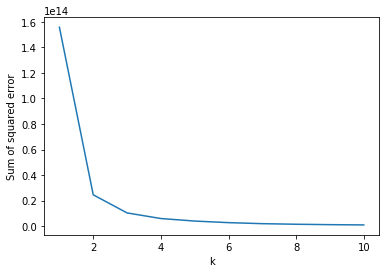

In [282]:
plt.xlabel('k')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [305]:
y = boardgame_final['ID']
X = boardgame_final.drop(columns='ID')

In [306]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [307]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [308]:
knn.score(X_train, y_train)

0.4812145805639124

In [309]:
knn.score(X_test, y_test)

0.0

In [314]:
# allot a single cluster to a movie 
bg = []
def fi(group):
    a = pd.DataFrame(group)
    b = pd.DataFrame(a['Cluster'].value_counts())
    d = a.index 
    c = [a['ID'][d[0]],int(b.idxmax())]
    bg.append(c) 

In [315]:
boardgame_final.groupby("ID").apply(lambda x: fi(x))


""


In [316]:
bg = pd.DataFrame(bg)


In [317]:
bg.head()


,0,1
0,1,0
1,1,0
2,2,0
3,3,0
4,4,0


In [318]:
# rename colomn headers 
bg.rename(columns = {0:'ID',1:'Cluster'},inplace=True)
bg.drop_duplicates(inplace=True)

In [319]:
bg.head(10)


,ID,Cluster
0,1,0
2,2,0
3,3,0
4,4,0
5,5,0
6,6,0
7,7,0
8,8,0
9,9,0
10,10,0


In [320]:
#merge the data with the orginal board game final to show tiitle 

new_bg_data = pd.merge(bg , boardgame_df , how='outer', on='ID')

In [321]:
new_bg_data.isnull().sum()


ID              0
Cluster       942
Name            0
Avg Rating      0
Complexity      0
Category        0
Mechanic        0
dtype: int64

In [322]:
# label bg randomly
new_bg_data.fillna(random.randint(0,8),inplace=True)

In [324]:
new_bg_data.isnull().sum()

new_bg_data

,ID,Cluster,Name,Avg Rating,Complexity,Category,Mechanic
0,1,0.0,Die Macher,7.62280,4.3433,"['Economic', 'Negotiation', 'Political']","['Area Majority / Influence', 'Auction/Bidding..."
1,2,0.0,Dragonmaster,6.60448,1.9630,"['Card Game', 'Fantasy']",['Trick-taking']
2,3,0.0,Samurai,7.44259,2.4961,"['Abstract Strategy', 'Medieval']","['Area Majority / Influence', 'Hand Management..."
3,4,0.0,Tal der Könige,6.60924,2.6667,['Ancient'],"['Action Points', 'Area Majority / Influence',..."
4,5,0.0,Acquire,7.34739,2.5057,['Economic'],"['Hand Management', 'Investment', 'Market', 'O..."
...,...,...,...,...,...,...,...
19995,5118,2.0,Deduction,5.99050,1.2000,['Deduction'],['Deduction']
19996,5123,2.0,Keyword,5.29444,1.0000,['Word Game'],['Word Game']
19997,5128,2.0,The Beatles Flip Your Wig Game,4.00000,1.6667,['Music'],"['Roll / Spin and Move', 'Set Collection']"
19998,5145,2.0,Det store norske spillet,5.97222,1.0000,['Trivia'],['Trivia']


In [353]:
#This function select the cluster for a user according the the user choice
def select_bg():
    global l
    print('Select the boardgames that you would like to play:')
    l=[]
    for i in range(15):
        l.append(random.randint(0,3883))
    for i in l:
        print(new_bg_data['ID'][i] , new_bg_data['Name'][i],sep='--->')
    print('--------------------------------------------------------------------')
    l = int(input())
    l = new_bg_data['Cluster'][new_bg_data.ID == l]

In [354]:
# This is the main function which recommend you board games 
def BoardgameRecommender():
    ans = False
    while not ans:
        select_bg()
        print(new_bg_data['Name'][new_bg_data.Cluster == int(l)].sample(n=10))
        print('--------------------------------------------------------------------')
        print('Here are similar board games you might also enjoy. Do these sound fun (y/n)')
        abc = input()
        while ((abc =='y') or (abc == 'Y')):          
            print(new_bg_data['Name'][new_bg_data.Cluster == int(l)].sample(n=10))
            print('--------------------------------------------------------------------')
            print('Want to see more (y/n) ?')
            abc = input()
            if ((abc =='N') or (abc == 'n')):
                ans =True

In [355]:
BoardgameRecommender()


Select the boardgames that you would like to play:
2866--->The London Game
1238--->Schlangennest
4038--->Skip-Bo Dice
193--->Tutto! Volle Lotte
1258--->Phase 10
3186--->The Famous Monarchs of England Card Game
2724--->Apache
804--->ThunderRoad
1978--->Rasant
1424--->Book of Lists Game
551--->Battle Cry
623--->Swashbuckler
1308--->Confusion
2540--->Beest
299--->De Bellis Antiquitatis
--------------------------------------------------------------------
